In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [5]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


# ЗАДАНИЕ 1

### Используя файл Lesson_1_extended.ipynb (он в web1.zip в материалах):
### Подберите скорость обучения и количество итераций


Для подбора скорости обучения необходимо задать критерий останова. В качестве такого критерия использовано "изменение весов".
Процесс подбора весов заканчивается когда изменение весов в итерации меньще epsilon = 1e-3
В качестве функции подбора я взял алгоритм из третьего задания.

In [6]:
def iter(X, eta=1e-2, delta_eta= 1.1, epsilon=1e-3, prt=False):
    ''' 
    X - обучающая выборка
    eta - скорость обучения
    delta_eta - корректировка скорости обучения
    epsilon - критерий останова
    prt - вывод на экран лога
    '''
    eta_start = eta
    n = X.shape[0]
    W = np.array([1, 0.5])    
    W_old = np.array([np.inf, np.inf])
    i = 0
    while ((sum(np.abs(W_old-W)>epsilon))>0): 
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W_old = W.copy()
        W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
        if i % 50 == 0:
            eta /= delta_eta            
            if prt:
                print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        i +=1 
    return [i, eta_start, delta_eta, err]


Произведём поиск скоростей обучения в 3-х диапазонах для разных значений корректировки. Использоване одного и того же диапазона затруднительно по причине того что при некоторых значениях скоростей фунйия выдаёт ошибку в силу больших значений, поэтому диапазоны подобраны под значения.

In [7]:
range1 = np.linspace(0.01, 0.056, 100)  # для delta_eta = 1  
range2 = np.linspace(0.01, 0.07, 100)  # для delta_eta = 1.05 
range3 = np.linspace(0.01, 0.08, 100) # для delta_eta = 1.1  

Генерируем массивы, прогоняя функцию _iter()_ по всему диапазону скоростей обучения с разными значениями корректировки 

In [8]:
iterations1 = np.array([iter(X, eta=el, delta_eta=1) for el in range1])
iterations2 = np.array([iter(X, eta=el, delta_eta=1.05) for el in range2])
iterations3 = np.array([iter(X, eta=el, delta_eta=1.1) for el in range3])

Находим минимальное значение количества итераций при разных значениях корректировки. Определяем оптимальные значения скоростей обучения.

In [9]:
result1 = iterations1[iterations1[:,0]==np.min(iterations1[:,0]),:]
result2 = iterations2[iterations2[:,0]==np.min(iterations2[:,0]),:]
result3 = iterations3[iterations3[:,0]==np.min(iterations3[:,0]),:]
print(f'для корректировки delta_eta = 1, \nскорость обучения =  {round(result1[0][1],3)},\
    количество итераций = {result1[0][0]}, MSE = {result1[0][3]}\n\n')
print(f'для корректировки delta_eta = 1.05, \nскорость обучения =  {round(result2[0][1],3)},\
    количество итераций = {result2[0][0]}, MSE = {result2[0][3]}\n\n')
print(f'для корректировки delta_eta = 1.1, \nскорость обучения =  {round(result3[0][1],3)},\
    количество итераций = {result3[0][0]}, MSE = {result3[0][3]}')


для корректировки delta_eta = 1, 
скорость обучения =  0.055,    количество итераций = 148.0, MSE = 43.968972105504044


для корректировки delta_eta = 1.05, 
скорость обучения =  0.06,    количество итераций = 150.0, MSE = 43.96894233195637


для корректировки delta_eta = 1.1, 
скорость обучения =  0.067,    количество итераций = 148.0, MSE = 43.96895159857338


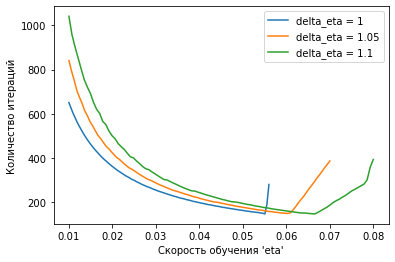

In [18]:
plt.plot(range1, iterations1[:,0], label = 'delta_eta = 1')
plt.plot(range2, iterations2[:,0], label = 'delta_eta = 1.05')
plt.plot(range3, iterations3[:,0], label = 'delta_eta = 1.1')
plt.xlabel("Скорость обучения 'eta'")
plt.ylabel("Количество итераций")
plt.legend()
plt.show()

# Вывод:
  1. Введение корректировки привело к возможности повысить скорость обучения, но в данном примере это не привело к каким то значитлеьным выигрышам по количеству итераций. 
  2. Так же пришлось изменить частоту применения корректировки, с одного раза за каждые 10 итерраций до 1 раза каждые 50 итерраций
  3. Итоговые значения: 
  
для корректировки delta_eta = 1, 
скорость обучения =  0.055,    количество итераций = 148.0, MSE = 43.968972105504044


для корректировки delta_eta = 1.05, 
скорость обучения =  0.06,    количество итераций = 150.0, MSE = 43.96894233195637


для корректировки delta_eta = 1.1, 
скорость обучения =  0.067,    количество итераций = 148.0, MSE = 43.96895159857338

# ЗАДАНИЕ 2

### В коде есть ошибка, исправьте ее.

Ошибка заключается в том что в строке:

        W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
        
умножается не транспонированная матрица X. 
До изменения использовался срез, который неявным образом транспонировал Х.

In [11]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y)) # ОШИБКА надо использовать Х.Т
    # ИЗМЕНЕНИЯ
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


# ЗАДАНИЕ 3

### Вместо того, чтобы задавать количество итераций, задайте 
### другое условие останова алгоритма - когда веса перестают 
### изменяться меньше определенного порога  𝜖 .

In [12]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100
epsilon = 1e-3
W = np.array([1, 0.5])
W_old = np.array([np.inf, np.inf])
i=0
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
while ((sum(np.abs(W_old-W)>epsilon))>0):     
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W_old = W.copy()
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    i +=1 


Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9